In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Train Test Split

In [4]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1958-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


## Fitting the Model

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [7]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [8]:
test_predictions

1958-01-01    356.968596
1958-02-01    344.588791
1958-03-01    405.718324
1958-04-01    400.610821
1958-05-01    409.001638
1958-06-01    480.694110
1958-07-01    530.469966
1958-08-01    523.288424
1958-09-01    454.210492
1958-10-01    392.518042
1958-11-01    345.928317
1958-12-01    396.605036
1959-01-01    408.958744
1959-02-01    394.775902
1959-03-01    464.808553
1959-04-01    458.957175
1959-05-01    468.570060
1959-06-01    550.704073
1959-07-01    607.729459
1959-08-01    599.501971
1959-09-01    520.363289
1959-10-01    449.685736
1959-11-01    396.310521
1959-12-01    454.367974
1960-01-01    468.520919
1960-02-01    452.272438
1960-03-01    532.504888
1960-04-01    525.801296
1960-05-01    536.814234
1960-06-01    630.910531
1960-07-01    696.241292
1960-08-01    686.815524
1960-09-01    596.150810
1960-10-01    515.179531
1960-11-01    454.030564
1960-12-01    520.543707
Freq: MS, Name: HW Forecast, dtype: float64

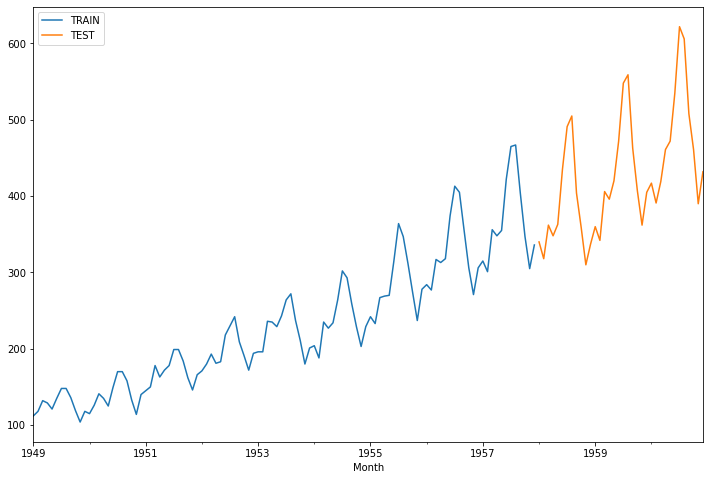

In [9]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

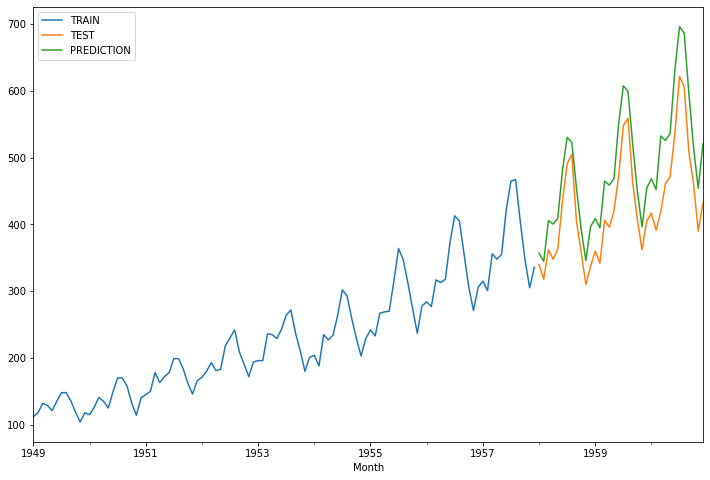

In [10]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

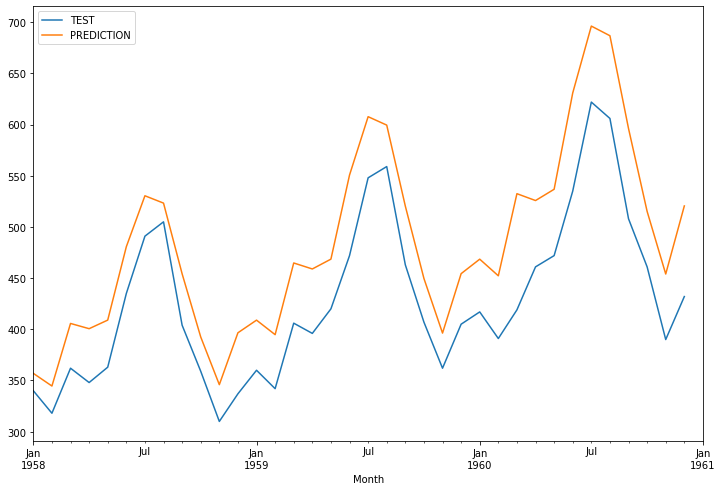

In [11]:
#train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [13]:
mean_absolute_error(test_data,test_predictions)

55.69782636118518

In [14]:
mean_squared_error(test_data,test_predictions)

3525.867525316523

In [15]:
np.sqrt(mean_squared_error(test_data,test_predictions))

59.37901586685757

In [16]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [17]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [18]:
forecast_predictions = final_model.forecast(36)

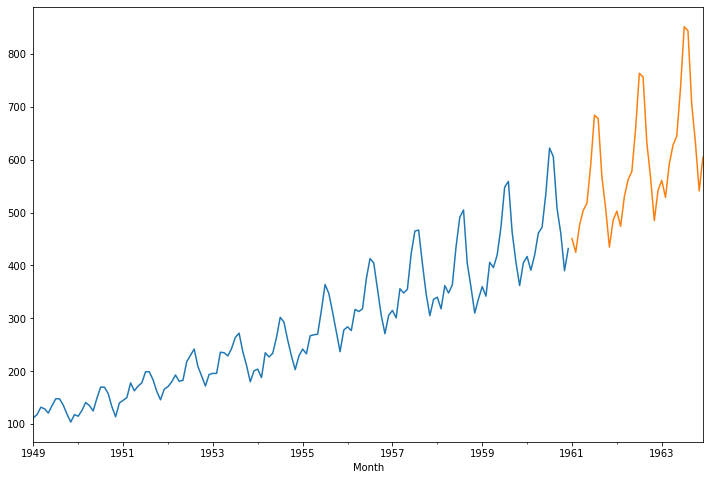

In [19]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();